In [137]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 

In [4]:
df = pd.read_csv('data/final_data.csv')
df.head()

,product_id,store_id,selling_price,customer_id,order_id,year,month,day,day_of_week,quarter,week_of_year,product,brand,type,category,sub_category,storetype_id,store_szie,city_id,state_code,state,city
0,P0506,S0063,4427,123564153,1111139641,2025,1,1,2,1,1,Chakra Stainless Steel Scrub,Scotch brite,Blended Masalas,"Foodgrains, Oil & Masala",Masalas & Spices,ST04,23 qm,C033,FL,Florida,Miami
1,P0061,S0084,3125,123523135,1111134828,2025,1,1,2,1,1,Jasmine Bloom Soap Bar,Lux,Bathing Bars & Soaps,Beauty & Hygiene,Bath & Hand Wash,ST04,19 qm,C022,DC,District of Columbia,Washington
2,P0608,S0105,2438,123528720,1111141728,2025,1,1,2,1,1,Milk Shake - Strawberry,Milky Mist,"Flavoured, Soya Milk","Bakery, Cakes & Dairy",Dairy,ST04,25 qm,C032,NY,New York,Syracuse
3,P0470,S0031,3887,123552589,1111122688,2025,1,1,2,1,1,Multigrain Biscuit,Chai Point,Rusks,"Bakery, Cakes & Dairy","Cookies, Rusk & Khari",ST04,41 qm,C036,AZ,Arizona,Phoenix
4,P0682,S0015,4194,123457812,1111120360,2025,1,1,2,1,1,Wafers - Waffy,Orange Flavor,Cookies,Snacks & Branded Foods,Biscuits & Cookies,ST04,19 qm,C014,TN,Tennessee,Knoxville


--------
# 2. Analysis Requirements (Industry Standard)
--------


# *<span style="color:pink">Sales Analysis</span>*
--------


- Revenue


In [11]:
total_revenue = df['selling_price'].sum()
print(f'Total Revenue: {total_revenue:,.2f}')

Total Revenue: 190,407,631.00


- trends

In [14]:
df.columns

Index(['product_id', 'store_id', 'selling_price', 'customer_id', 'order_id',
       'year', 'month', 'day', 'day_of_week', 'quarter', 'week_of_year',
       'product', 'brand', 'type', 'category', 'sub_category', 'storetype_id',
       'store_szie', 'city_id', 'state_code', 'state', 'city'],
      dtype='object')

month
1              NaN
2              NaN
3     1.578784e+07
4     1.539629e+07
5     1.581176e+07
6     1.572126e+07
7     1.589371e+07
8     1.592115e+07
9     1.606378e+07
10    1.606617e+07
11    1.596569e+07
12    1.589633e+07
Name: selling_price, dtype: float64 .2f


<Axes: title={'center': 'Sales Trend (3-Month Moving Average)'}, xlabel='month'>

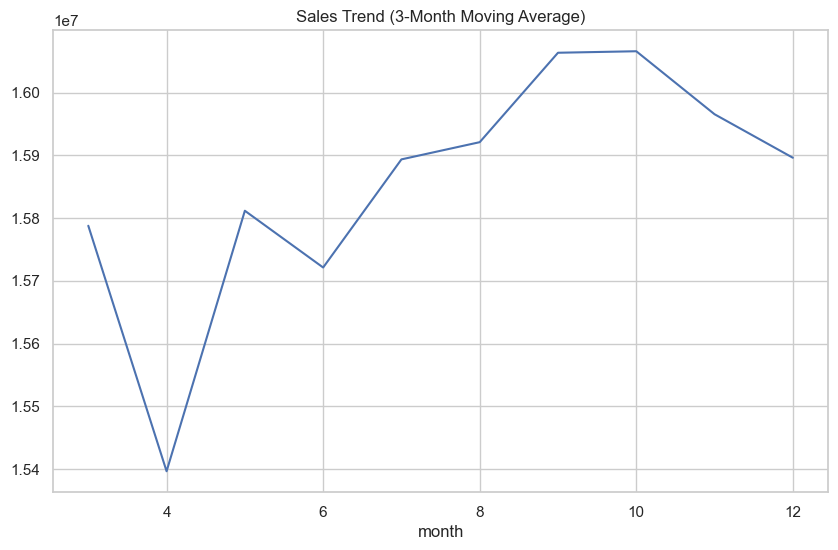

In [ ]:
sales_month = df.groupby('month')['selling_price'].sum()

trend = sales_month.rolling(window=3).mean()
print(trend)

sales_month.rolling(window=3).mean().plot(title='Sales Trend (3-Month Moving Average)')


- seasonal demand

seasonal_sales: month
1     2595.13
2     2561.38
3     2527.80
4     2554.16
5     2580.48
6     2548.33
7     2586.20
8     2561.69
9     2568.35
10    2538.90
11    2559.76
12    2524.78
Name: selling_price, dtype: float64


<Axes: title={'center': 'Average Monthly Demand'}, xlabel='month'>

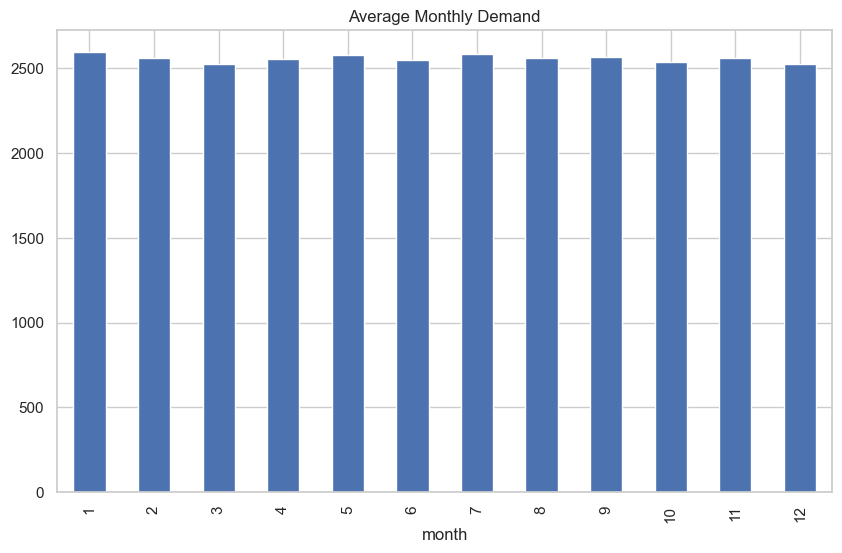

In [26]:
# Extract month as integer for seasonal grouping

seasonal_sales = round(df.groupby('month')['selling_price'].mean(),2)
print(f"seasonal_sales: {seasonal_sales}")

# This shows average demand per month
df.groupby('month')['selling_price'].mean().plot(kind='bar', title='Average Monthly Demand')


- top products

product
Baby Corn - Unpeeled                                                 2023022
Snacks - Stars, Banana & Honey, 2+ Years, 100% Natural & Healthy     1905959
Snacks - Sticks, Carrot & Cumin, 2+ Years, 100% Natural & Healthy    1748098
Ready to Cook - Potato French Fries                                  1698318
Snacks - Rings, Tomato & Cheese, 2+ Years, 100% Natural & Healthy    1463438
Skin Lightening Oxygen Bleach - Rich Fairness                        1457470
Black Mustard/Sasive/Rai - Big                                       1440194
Coccinia - Organically Grown                                         1419391
Instant Popcorn - Chilly Surprise                                    1410178
Lemon Grass                                                          1396973
Name: selling_price, dtype: int64


<Axes: title={'center': 'Top 10 Products by Revenue'}, xlabel='product'>

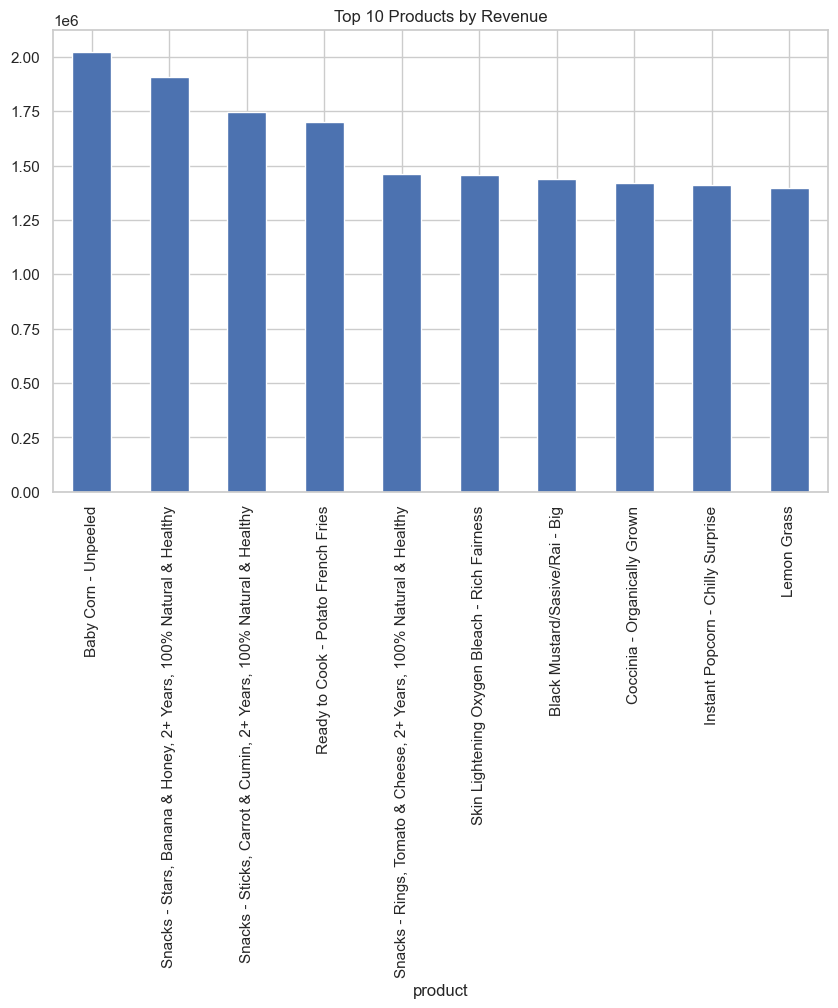

In [28]:
top_products = df.groupby('product')['selling_price'].sum().sort_values(ascending=False).head(10)
print(top_products)
top_products.plot(kind='bar', title='Top 10 Products by Revenue')

- total orders

In [32]:
total_orders = df['order_id'].nunique()
print(f'Total Orders: {total_orders:,.2f}')


Total Orders: 74,408.00


- product sold

In [40]:
total_sold = df.groupby('product_id').size().reset_index(name='total_units_sold')
print(total_sold)

    product_id  total_units_sold
0        P0001                72
1        P0002                 9
2        P0004                 7
3        P0005               117
4        P0006                 8
5        P0007                72
6        P0008                45
7        P0009                67
8        P0010                 9
9        P0011                21
10       P0012                52
11       P0014                24
12       P0015               390
13       P0016                 5
14       P0017               345
15       P0018               303
16       P0019                22
17       P0020                 5
18       P0021                13
19       P0022                28
20       P0024                37
21       P0025                45
22       P0026               184
23       P0027                 1
24       P0028               173
25       P0029                 6
26       P0030                56
27       P0031                 2
28       P0032                13
29       P

- Average Order Value (AOV)
    - AOV is the average total spending per order.

In [41]:
order_totals = df.groupby('order_id')['selling_price'].sum()
aov = order_totals.mean()
print(f'Average Order Value (AOV): {aov:,.2f}')

Average Order Value (AOV): 2,558.97


- Sales trend over daily, weekly, monthly, quarterly, yearly

daily sales: day
1     6413253
2     6371754
3     6006086
4     6502637
5     6113815
6     6149975
7     6445588
8     6109984
9     6166272
10    6331685
11    6322954
12    6116908
13    6199282
14    6432694
15    6225302
16    5947142
17    6511636
18    6390004
19    6450491
20    6237209
21    6094313
22    6142026
23    6289273
24    6258772
25    6395263
26    5831972
27    6175587
28    6215796
29    5880313
30    5886925
31    3792720
Name: selling_price, dtype: int64


<Axes: title={'center': 'Daily Sales'}, xlabel='Daily sales', ylabel='Total Sales'>

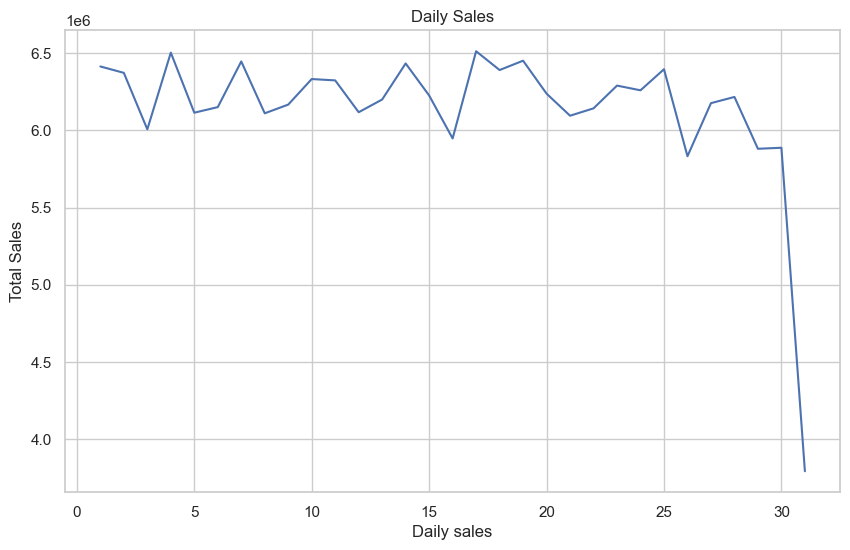

In [54]:
# Daily sales
sales_day = df.groupby('day')['selling_price'].sum()
print(f'daily sales: {sales_day}')
df.groupby('day')['selling_price'].sum().plot(kind='line',title='Daily Sales', xlabel='Daily sales', ylabel='Total Sales')

weekly sales: week_of_year
1     4187931
2     3748321
3     3697280
4     3788111
5     3758249
6     3593355
7     3695916
8     3868819
9     3523099
10    3620791
11    3527551
12    3586029
13    3525884
14    3635879
15    3640987
16    3710279
17    3490565
18    3570640
19    3569078
20    3686432
21    3625222
22    3633026
23    3770409
24    3635456
25    3553217
26    3583683
27    3490699
28    3625500
29    3516445
30    3820369
31    3800786
32    3655479
33    3682068
34    3535161
35    3570956
36    3709715
37    3685078
38    3857856
39    3723826
40    3652824
41    3505489
42    3752191
43    3703265
44    3573211
45    3798974
46    3626267
47    3784432
48    3485444
49    3542419
50    3679785
51    3457048
52    3946135
Name: selling_price, dtype: int64


<Axes: title={'center': 'Weekly Sales'}, xlabel='Weekly sales', ylabel='Total Sales'>

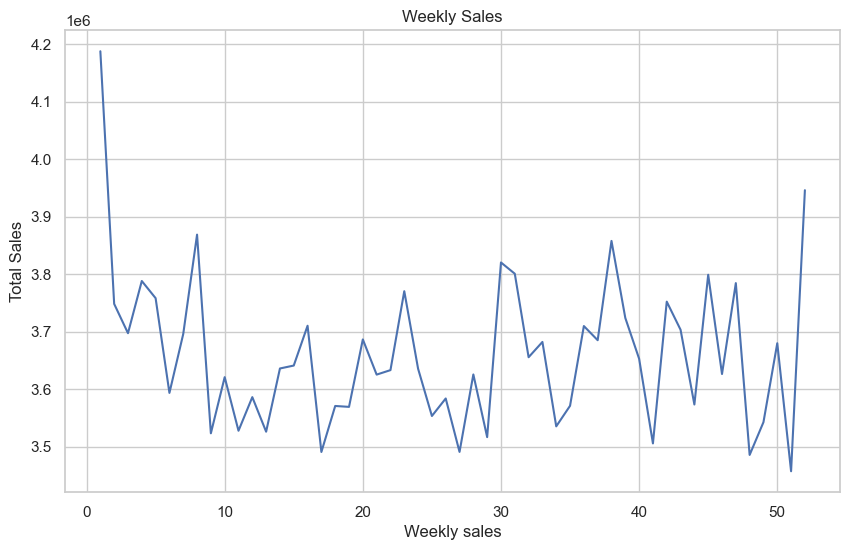

In [55]:
# Weekly sales
sales_weekly = df.groupby('week_of_year')['selling_price'].sum()
print(f'weekly sales: {sales_weekly}')
df.groupby('week_of_year')['selling_price'].sum().plot(kind='line',title='Weekly Sales',xlabel='Weekly sales', ylabel='Total Sales')

monthly sales: month
1     16647777
2     14884157
3     15831597
4     15473116
5     16130579
6     15560076
7     15990461
8     16212922
9     15987960
10    15997630
11    15911491
12    15779865
Name: selling_price, dtype: int64


<Axes: title={'center': 'Monthly Sales'}, xlabel='Monthly sales', ylabel='Total Sales'>

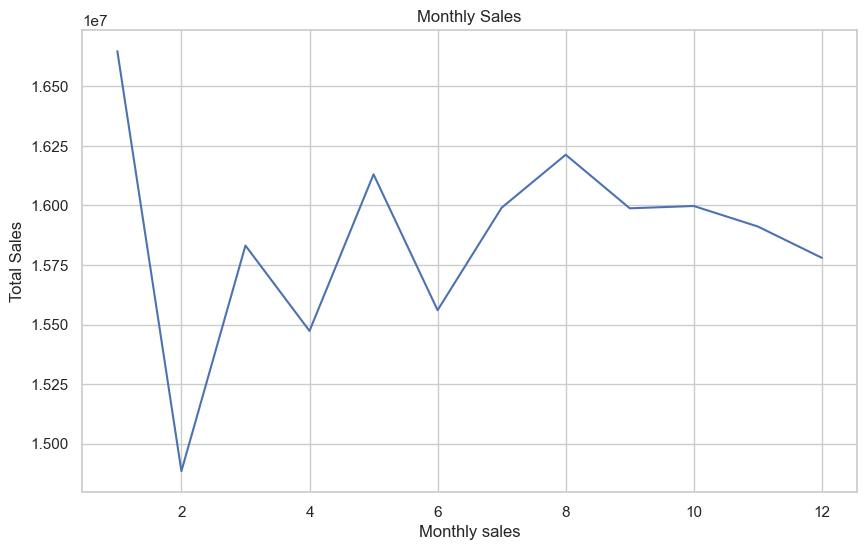

In [56]:
# Monthly sales
sales_month = df.groupby('month')['selling_price'].sum()
print(f'monthly sales: {sales_month}')
df.groupby('month')['selling_price'].sum().plot(kind='line',title='Monthly Sales',xlabel='Monthly sales', ylabel='Total Sales')

quarterly sales: quarter
1    47363531
2    47163771
3    48191343
4    47688986
Name: selling_price, dtype: int64


<Axes: title={'center': 'Quarterly Sales'}, xlabel='Quarterly sales', ylabel='Total Sales'>

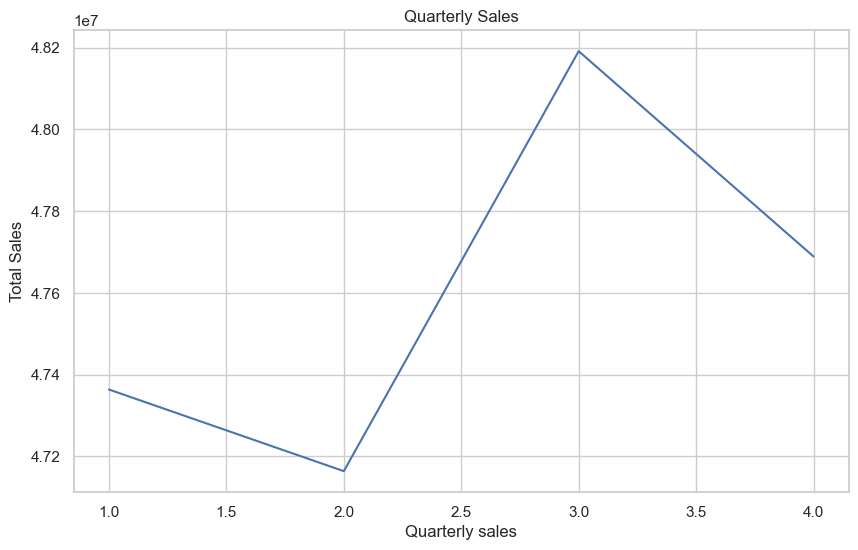

In [57]:
# Quarterly sales
sales_quarterly = df.groupby('quarter')['selling_price'].sum()
print(f'quarterly sales: {sales_quarterly}')
df.groupby('quarter')['selling_price'].sum().plot(kind='line',title='Quarterly Sales',xlabel='Quarterly sales', ylabel='Total Sales')


yearly sales: year
2022    48048463
2023    47924149
2024    47271305
2025    47163714
Name: selling_price, dtype: int64


<Axes: title={'center': 'Yearly Sales'}, xlabel='Yearly sales', ylabel='Total Sales'>

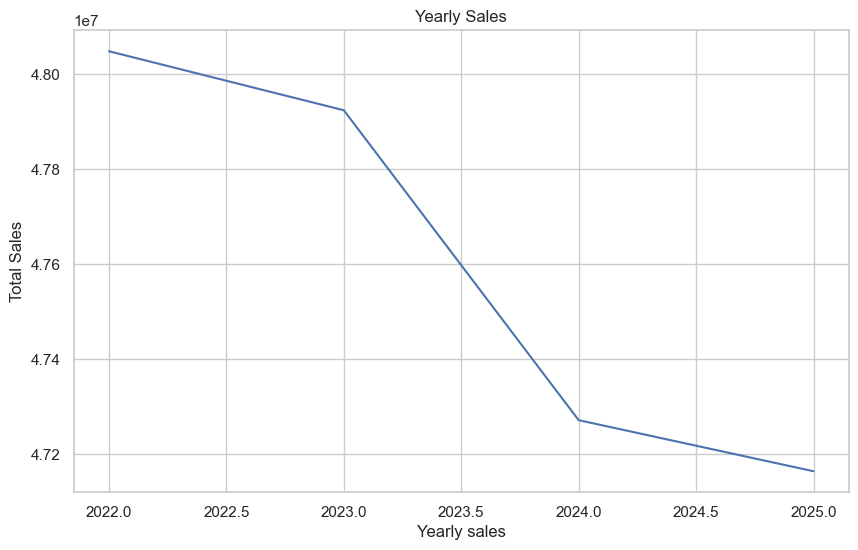

In [58]:
# Yearly sales
sales_yearly = df.groupby('year')['selling_price'].sum()
print(f'yearly sales: {sales_yearly}')
df.groupby('year')['selling_price'].sum().plot(kind='line',title='Yearly Sales',xlabel='Yearly sales', ylabel='Total Sales')

- Revenue by categoty, brand, product

revenue by category: category
Snacks & Branded Foods       62380362
Fruits & Vegetables          41953688
Beauty & Hygiene             18843110
Foodgrains, Oil & Masala     18755166
Bakery, Cakes & Dairy        18521539
Cleaning & Household         14509634
Beverages                     7701225
Gourmet & World Food          6747169
Baby Care                      694349
Kitchen, Garden & Pets         301389
Name: selling_price, dtype: int64


<Axes: title={'center': 'Revenue by Category'}, xlabel='Category', ylabel='Total Revenue'>

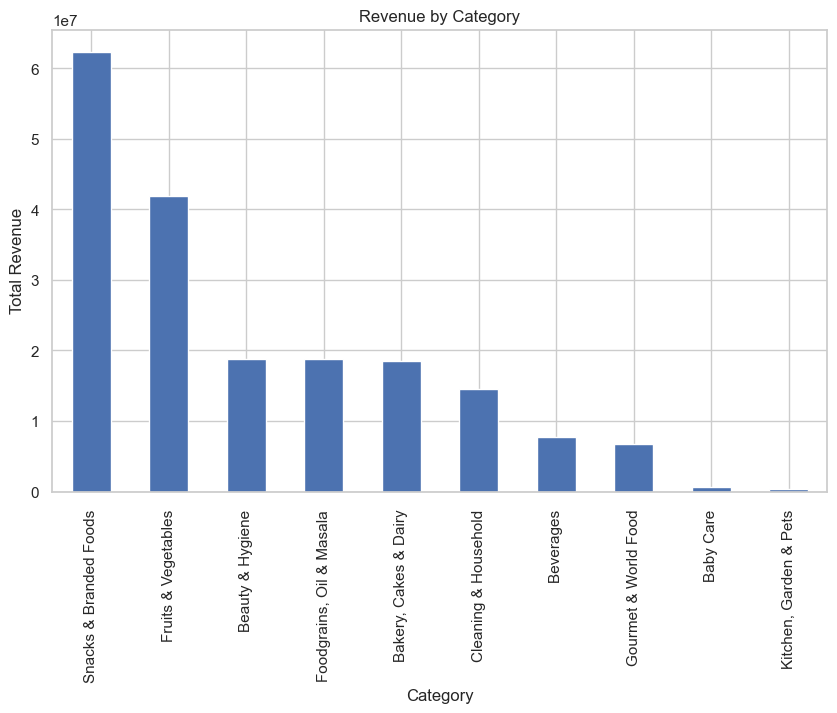

In [66]:
# revenue by category
revenue_by_category = df.groupby('category')['selling_price'].sum().sort_values(ascending=False)
print(f'revenue by category: {revenue_by_category}')
revenue_by_category.plot(kind='bar', title='Revenue by Category', xlabel='Category', ylabel='Total Revenue')

revenue by brand: brand
Fresho                              40898426
Britannia                            9345357
bb Royal                             6415423
Timios                               5117495
Amul                                 4979531
Chings                               4144303
Keya                                 3533738
Saffola                              3271636
Kohinoor                             3176974
Parle                                3175609
Olivia                               2987168
Sunfeast                             2794462
Nestle                               2659462
ACT II                               2522091
Haldirams                            2489634
The Nibble Box                       2468140
B Vishal                             2299869
bb Popular                           2030904
Bauli                                1982572
Kelloggs                             1867420
B Natural                            1802923
Vi-john                        

<Axes: title={'center': 'Revenue by Brand'}, xlabel='Brand', ylabel='Total Revenue'>

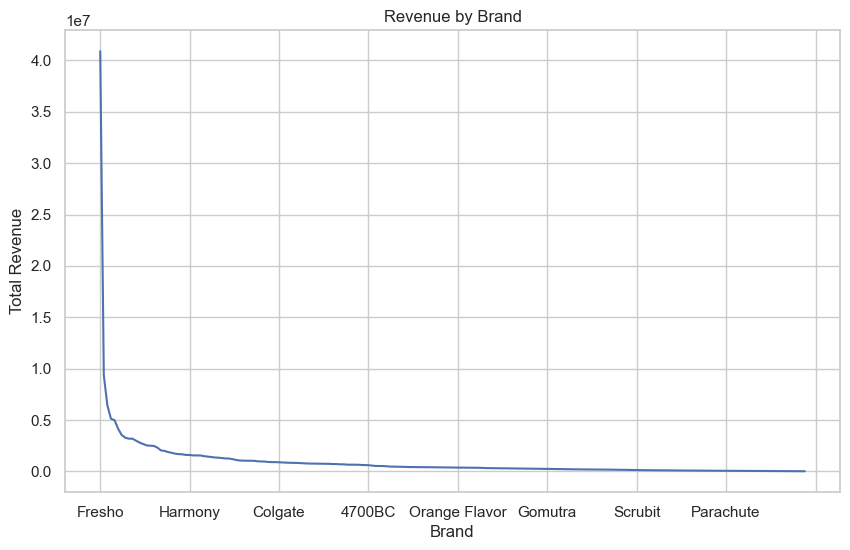

In [68]:
# Revenue by brand
revenue_by_brand = df.groupby('brand')['selling_price'].sum().sort_values(ascending=False)
print(f'revenue by brand: {revenue_by_brand}')
revenue_by_brand.plot(kind='line', title='Revenue by Brand', xlabel='Brand', ylabel='Total Revenue')

revenue by product: product
Baby Corn - Unpeeled                                                 2023022
Snacks - Stars, Banana & Honey, 2+ Years, 100% Natural & Healthy     1905959
Snacks - Sticks, Carrot & Cumin, 2+ Years, 100% Natural & Healthy    1748098
Ready to Cook - Potato French Fries                                  1698318
Snacks - Rings, Tomato & Cheese, 2+ Years, 100% Natural & Healthy    1463438
Skin Lightening Oxygen Bleach - Rich Fairness                        1457470
Black Mustard/Sasive/Rai - Big                                       1440194
Coccinia - Organically Grown                                         1419391
Instant Popcorn - Chilly Surprise                                    1410178
Lemon Grass                                                          1396973
Name: selling_price, dtype: int64


<Axes: title={'center': 'Top 10 Products by Revenue'}, xlabel='Product', ylabel='Total Revenue'>

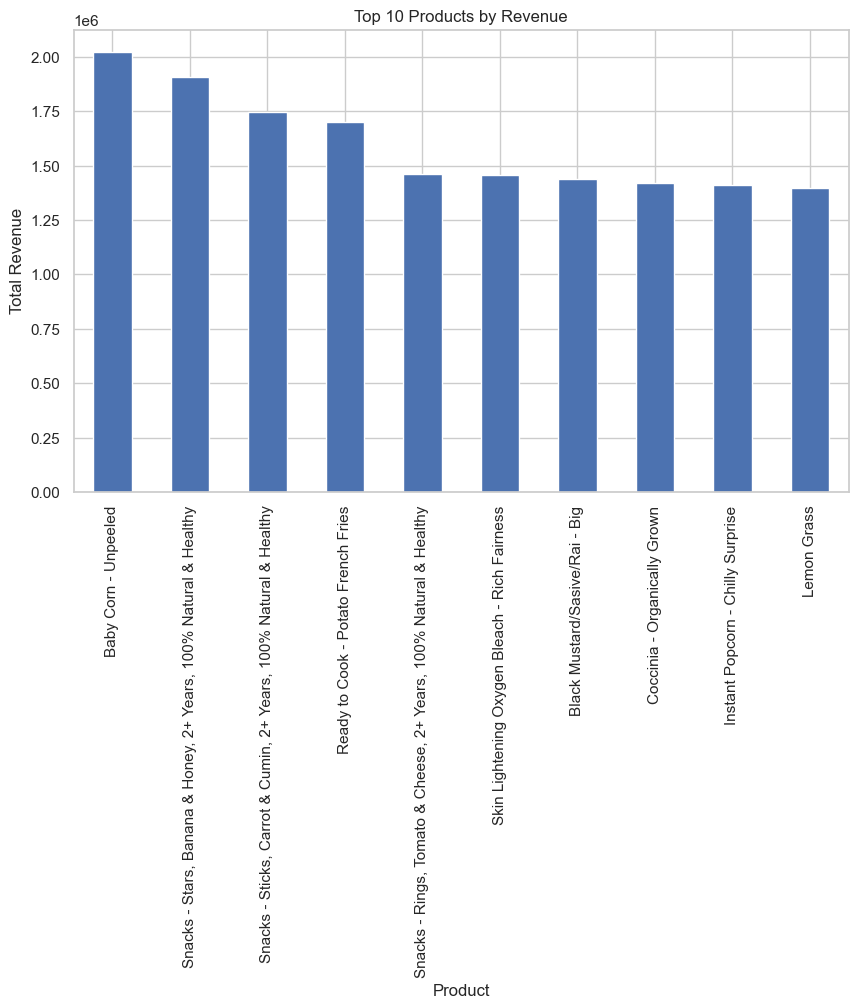

In [70]:
# Revenue by product
revenue_by_product = df.groupby('product')['selling_price'].sum().sort_values(ascending=False).head(10)
print(f'revenue by product: {revenue_by_product}') 
revenue_by_product.plot(kind='bar', title='Top 10 Products by Revenue', xlabel='Product', ylabel='Total Revenue')   


best 10 selling products: product
Arai Keerai                                                          5000
Tasty Twist Special Navratan Multi-Use Seasoning                     5000
Bay Leaf/Lavangada Ele                                               5000
Snacks - Sticks, Carrot & Cumin, 2+ Years, 100% Natural & Healthy    5000
Sweet Potato - Organically Grown                                     5000
Skin Lightening Oxygen Bleach - Rich Fairness                        5000
Noodles - Fiery Chilli                                               5000
Birthday Candle - No. 5                                              5000
Pooja Agarbatti - Treya 3 in 1                                       5000
Sambar Masala                                                        5000
Name: selling_price, dtype: int64


<Axes: title={'center': 'Best Selling Products'}, xlabel='Product', ylabel='Max Selling Price'>

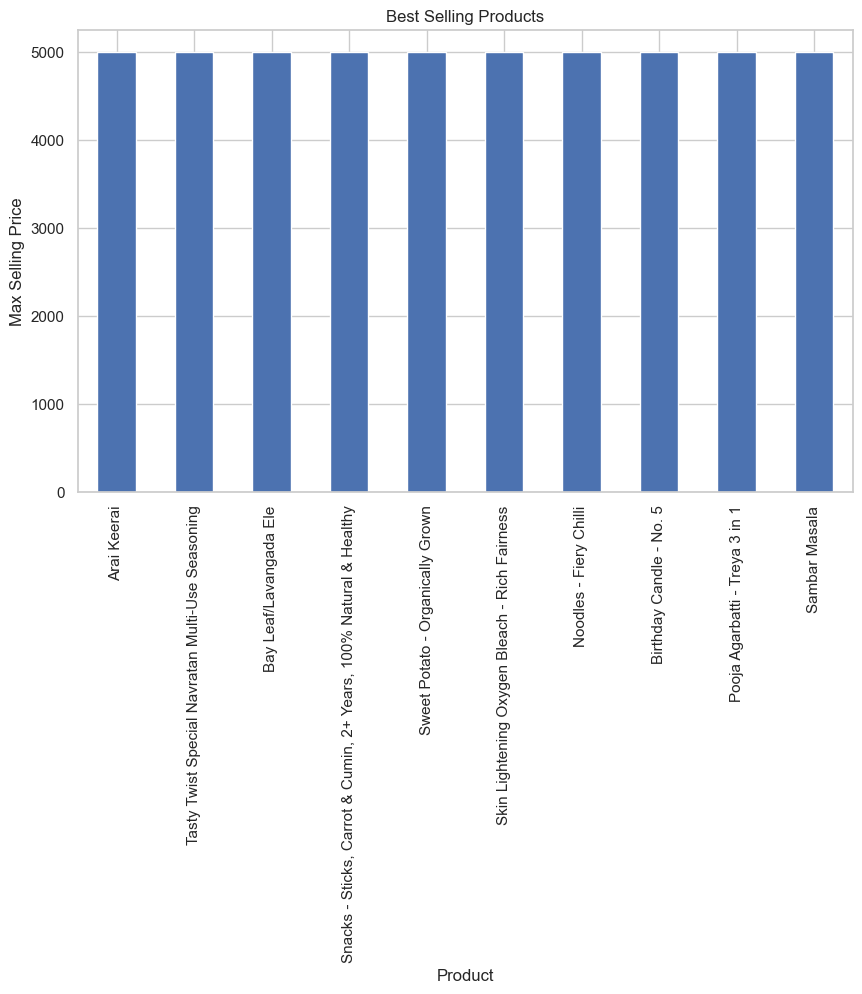

In [74]:
# Best selling products
best_selling_products = df.groupby('product')['selling_price'].max().sort_values(ascending=False).head(10)
print(f'best 10 selling products: {best_selling_products}')
best_selling_products.plot(kind='bar', title='Best Selling Products', xlabel='Product', ylabel='Max Selling Price')

least 10 selling products: product
Sambar Masala                                                        100
Ready Masala - Punjabi Butter Chicken                                100
Pooja Essential                                                      100
Organic Sprouts Mixed Gram                                           100
Namkeen - Lite Chiwda                                                100
Masala Oats - Curry & Pepper                                         100
Mechanical Pencil - Da Vinci Ii, 0.7mm                               100
Snacks - Sticks, Carrot & Cumin, 2+ Years, 100% Natural & Healthy    100
Instant Noodle - Special Chicken Flavour                             100
Strong Garlic Instant Noodles                                        100
Name: selling_price, dtype: int64


<Axes: title={'center': 'Least Selling Products'}, xlabel='Product', ylabel='Min Selling Price'>

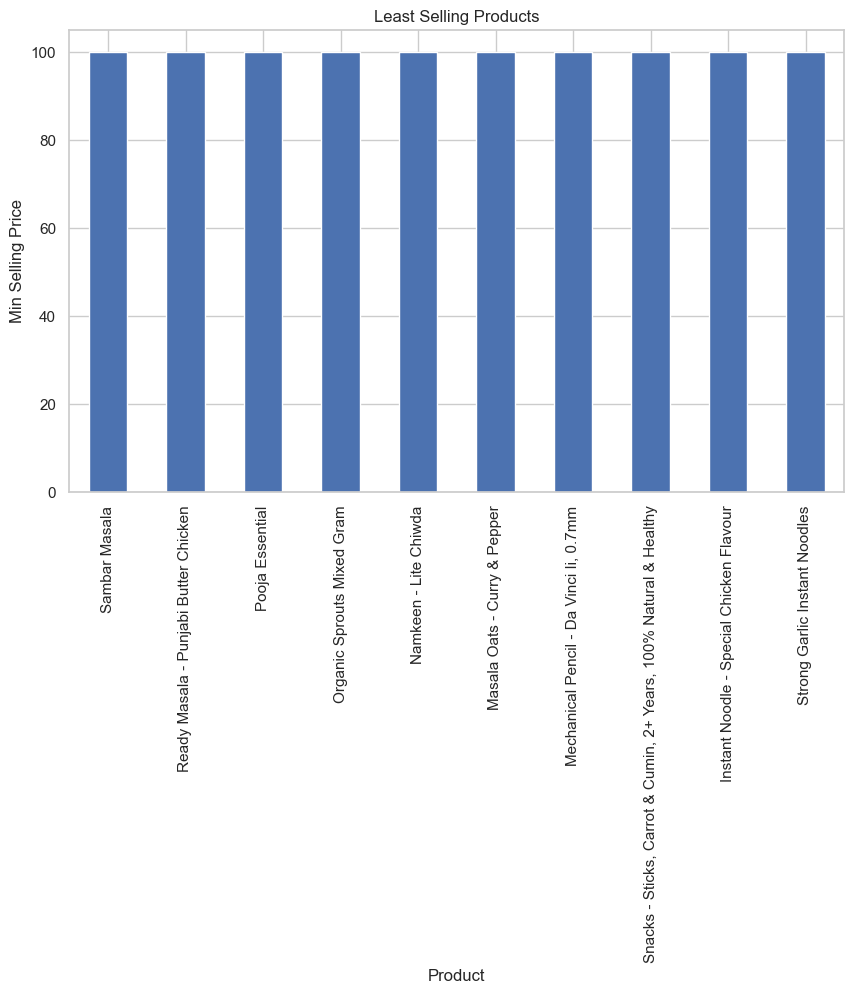

In [76]:
# Least selling products
least_selling_products = df.groupby('product')['selling_price'].min().sort_values(ascending=True).head(10)
print(f'least 10 selling products: {least_selling_products}')
least_selling_products.plot(kind='bar', title='Least Selling Products', xlabel='Product', ylabel='Min Selling Price')  

---------
# *<span style="color:pink">2. Product Analysis</span>*
---------

- Top-performing products (by revenue & quantity)

top performing product by revenue : product
Baby Corn - Unpeeled                                                 2023022
Snacks - Stars, Banana & Honey, 2+ Years, 100% Natural & Healthy     1905959
Snacks - Sticks, Carrot & Cumin, 2+ Years, 100% Natural & Healthy    1748098
Ready to Cook - Potato French Fries                                  1698318
Snacks - Rings, Tomato & Cheese, 2+ Years, 100% Natural & Healthy    1463438
Skin Lightening Oxygen Bleach - Rich Fairness                        1457470
Black Mustard/Sasive/Rai - Big                                       1440194
Coccinia - Organically Grown                                         1419391
Instant Popcorn - Chilly Surprise                                    1410178
Lemon Grass                                                          1396973
Name: selling_price, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------
top prformi

<Axes: title={'center': 'Top 10 Products by Quantity Sold'}, xlabel='Product ID', ylabel='Quantity Sold'>

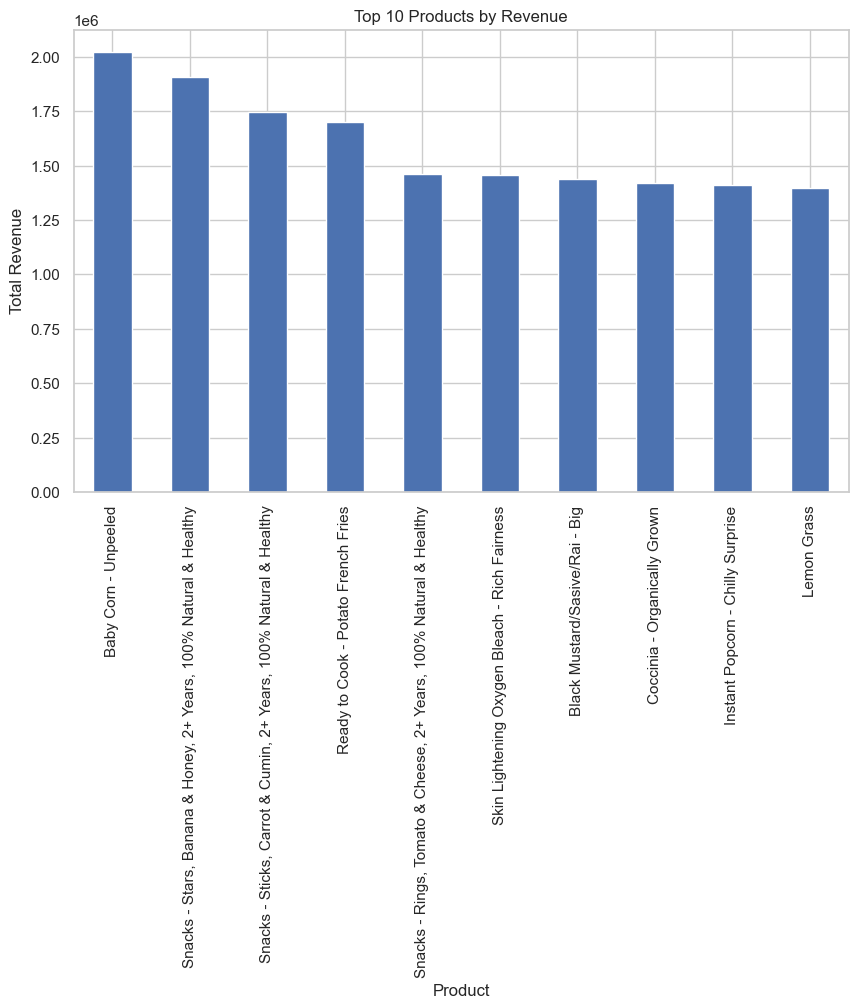

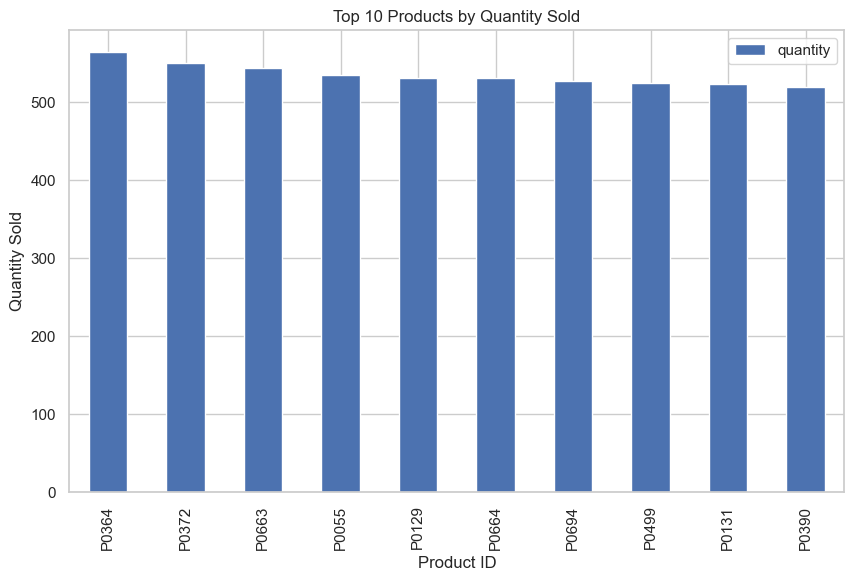

In [85]:
# top-performing products by revenue
revenue_by_product = df.groupby('product')['selling_price'].sum().sort_values(ascending=False).head(10)
print(f'top performing product by revenue : {revenue_by_product}') 
print('-------'*20)
revenue_by_product.plot(kind='bar', title='Top 10 Products by Revenue', xlabel='Product', ylabel='Total Revenue')   

# top-performing products by quantity
top_products = df['product_id'].value_counts().reset_index()
top_products.columns = ['product_id', 'quantity']
print(f'top prforming products by quantity: {top_products.head(10)}')
top_products.head(10).plot(kind='bar', x='product_id', y='quantity', title='Top 10 Products by Quantity Sold', xlabel='Product ID', ylabel='Quantity Sold')

- Product categories contribution to sales

Product Categories Contribution to Sales:

                    category  selling_price  contribution_percent
9    Snacks & Branded Foods        62380362             32.761482
6       Fruits & Vegetables        41953688             22.033617
2          Beauty & Hygiene        18843110              9.896195
5  Foodgrains, Oil & Masala        18755166              9.850008
1     Bakery, Cakes & Dairy        18521539              9.727309
4      Cleaning & Household        14509634              7.620301
3                 Beverages         7701225              4.044599
7      Gourmet & World Food         6747169              3.543539
0                 Baby Care          694349              0.364664
8    Kitchen, Garden & Pets          301389              0.158286


<Axes: title={'center': 'Product Categories Contribution to Sales'}, xlabel='Category', ylabel='Contribution (%)'>

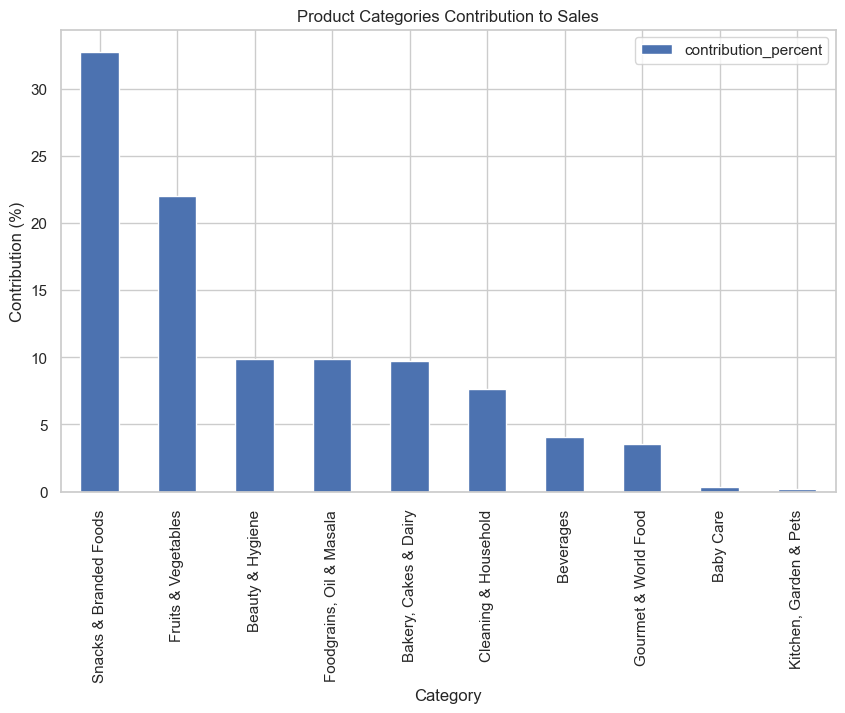

In [90]:
# Calculate total sales by category
sales_by_category = df.groupby('category')['selling_price'].sum().reset_index()

# Calculate percentage contribution
total_sales = sales_by_category['selling_price'].sum()
sales_by_category['contribution_percent'] = 100 * sales_by_category['selling_price'] / total_sales

# Sort for easier comparison
sales_by_category = sales_by_category.sort_values('contribution_percent', ascending=False)

print('Product Categories Contribution to Sales:\n')
print(sales_by_category)

# Plot contribution
sales_by_category.plot(kind='bar', x='category', y='contribution_percent', title='Product Categories Contribution to Sales', xlabel='Category', ylabel='Contribution (%)')

- Brand performance comparison

                                brand  selling_price
66                             Fresho       40898426
28                          Britannia        9345357
195                          bb Royal        6415423
179                            Timios        5117495
13                               Amul        4979531
43                             Chings        4144303
90                               Keya        3533738
157                           Saffola        3271636
96                           Kohinoor        3176974
143                             Parle        3175609
133                            Olivia        2987168
171                          Sunfeast        2794462
125                            Nestle        2659462
4                              ACT II        2522091
82                          Haldirams        2489634
176                    The Nibble Box        2468140
20                           B Vishal        2299869
194                        bb Popular        2

<Axes: title={'center': 'Brand Performance Comparison'}, xlabel='Brand', ylabel='Total Sales'>

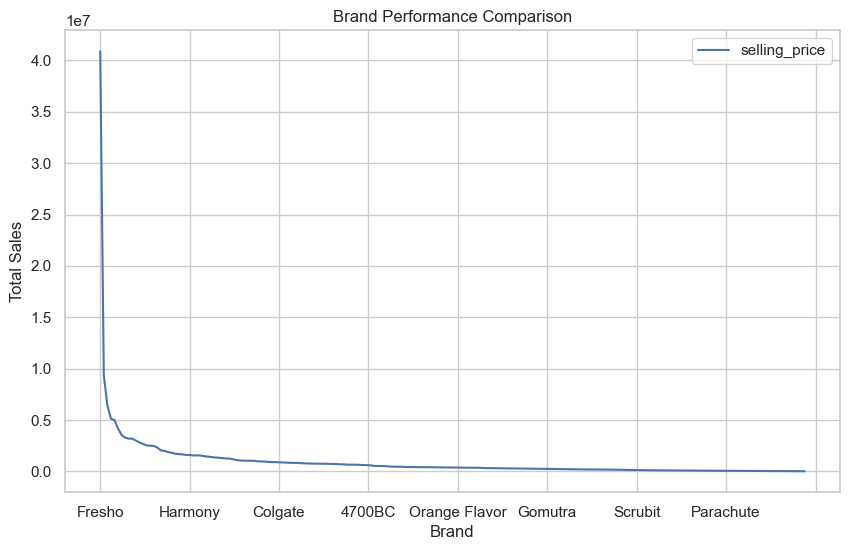

In [92]:
# brand performance comparison
brand_performance = df.groupby('brand')['selling_price'].sum().reset_index()
brand_performance = brand_performance.sort_values('selling_price', ascending=False)
print(brand_performance)
brand_performance.plot(kind='line', x='brand', y='selling_price', title='Brand Performance Comparison', xlabel='Brand', ylabel='Total Sales')


- Low performing product (for discount/clearance decisions)

Low Performing Products:
 product
Rai - Whole                                        1641
Marigold Flower - Orange                           2286
Yum Yum - Pineapple Cake                           2383
Meat/Mutton Masala                                 3001
Instant Popcorn - Natural Healthy                  3039
Glucose - Liquid                                   4051
Aloe Vera Kanti - Body Cleanser Soap               4210
Cornflour                                          4242
Moonfils - Strawberry                              4540
Anti Bacteria Fabric Stiffener - Instant Starch    4930
Name: selling_price, dtype: int64


<Axes: title={'center': 'Low Performing Products'}, xlabel='Product', ylabel='Total Sales'>

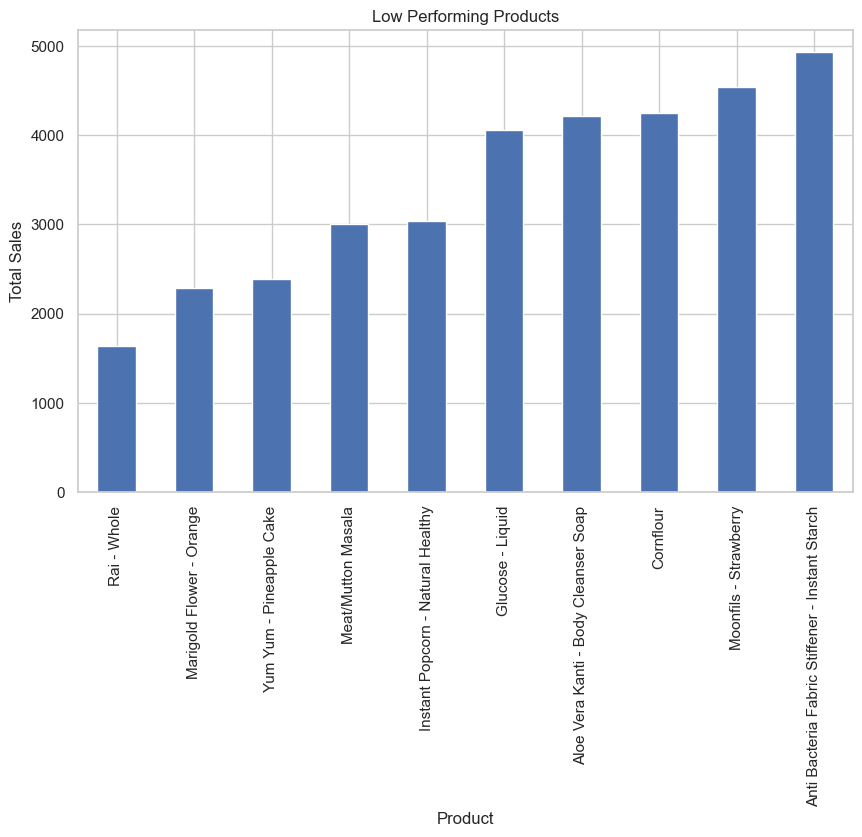

In [94]:
# Low performing product (for discount/clearance decisions)
low_performing_products = df.groupby('product')['selling_price'].sum().sort_values(ascending=True).head(10)
print(f'Low Performing Products:\n {low_performing_products}')
low_performing_products.plot(kind='bar', title='Low Performing Products', xlabel='Product', ylabel='Total Sales')

- Price vs demand analysis

                                               product  average_price  demand
0                      1-2-3 Noodles - Chicken Flavour    2705.052632     228
1                   1-2-3 Noodles - Veg Masala Flavour    2600.170124     241
2          3 Layer Gum - Sugarfreee Peppermint Flavour    2476.725352     142
3                           50-50 Jeera Masti Biscuits    2544.273657     391
4                   50-50 Maska Chaska Salted Biscuits    2403.472973      74
5                              50-50 Timepass Biscuits    2507.044444      45
6                       50-50 Timepass salted biscuits    2534.213675     117
7               7 O Click - Permasharp Stainless Blade    2676.447761     134
8                              Aam Panna - Mango Drink    2498.130435     138
9                                 Accel Detergent Cake    2482.786885      61
10                        Active - Detergent Cake Blue    2429.581633      98
11                  Agarbathi - Natural Incense Sticks    2729.3

<Axes: title={'center': 'Price vs Demand Analysis'}, xlabel='Average Price', ylabel='Demand (Number of Orders)'>

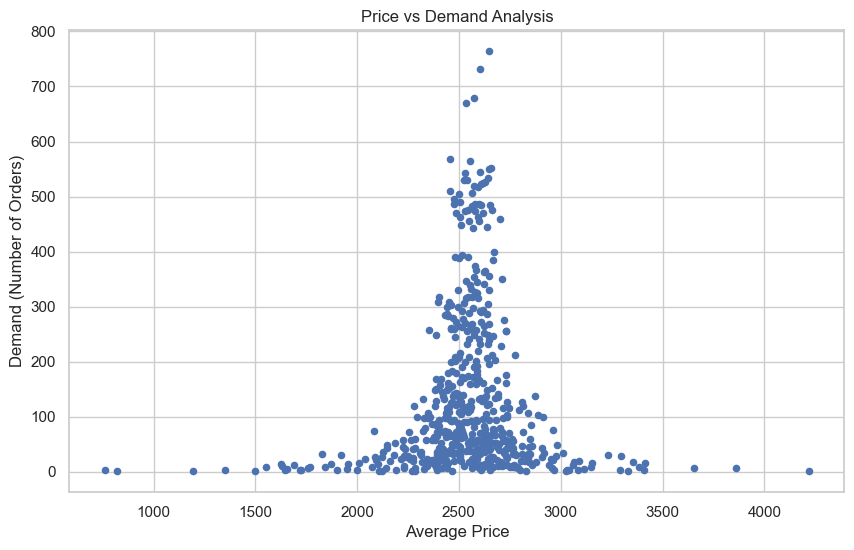

In [97]:
# Price vs demand analysis
price_demand = df.groupby('product').agg({'selling_price': 'mean', 'order_id': 'count'}).reset_index()
price_demand.columns = ['product', 'average_price', 'demand']  
print(price_demand)
price_demand.plot(kind='scatter', x='average_price', y='demand', title='Price vs Demand Analysis', xlabel='Average Price', ylabel='Demand (Number of Orders)')

---------
# *<span style="color:pink">3. Store & Regional Analysis</span>*
---------

- Sales by city, state, and region

--------------sales by city---------------
 city
Oklahoma City                9848490
Phoenix                      9421394
Springfield                  6597847
Des Moines                   6596094
Saint Louis                  5381006
Birmingham                   5193822
Toledo                       5101095
Miami                        4630770
Memphis                      4289587
Dallas                       4013934
Louisville                   3810274
Buffalo                      3777848
Kansas City                  3590966
Sacramento                   3573893
El Paso                      3395415
Cincinnati                   3338152
Saint Cloud                  2804194
Washington                   2799597
Columbus                     2614544
Arlington                    2569062
Pasadena                     2568619
Roanoke                      2480613
Littleton                    2345059
Katy                         2317577
Los Angeles                  2155617
Cleveland                 

<Axes: title={'center': 'Sales by City'}, xlabel='City', ylabel='Total Sales'>

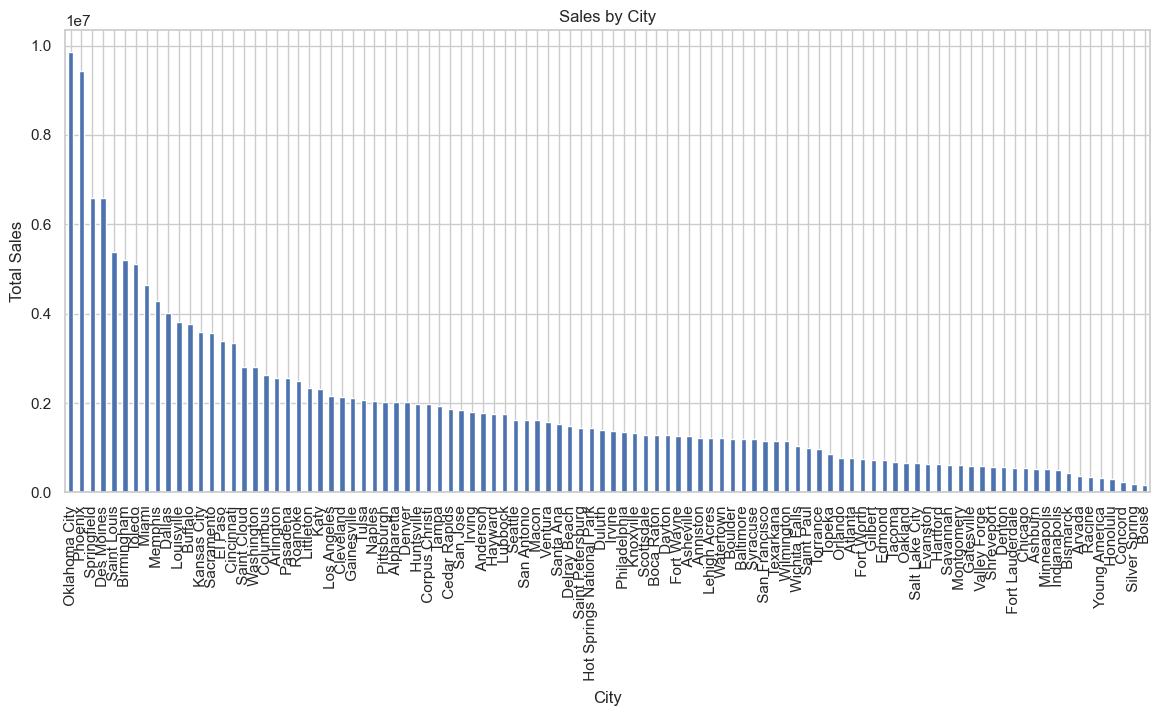

In [ ]:
# sales by city
sales_by_city = df.groupby('city')['selling_price'].sum().sort_values(ascending=False)
print(f'--------------sales by city---------------\n {sales_by_city}')
sales_by_city.plot(kind='bar', title='Sales by City', xlabel='City', ylabel='Total Sales', figsize=(14, 6))

--------------sales by state---------------
 state
Texas                    22903269
California               19392615
Florida                  17446597
Ohio                     14463814
Oklahoma                 12637073
Arizona                  11429309
Missouri                  9484596
Iowa                      8452250
Alabama                   7032688
Minnesota                 6020509
Colorado                  5931058
Tennessee                 5627145
Virginia                  5572219
Georgia                   5014448
New York                  4964417
Pennsylvania              3972045
Kentucky                  3810274
Illinois                  3658198
Massachusetts             3297573
District of Columbia      2799597
Kansas                    2364413
Washington                2300012
North Carolina            1801862
South Carolina            1776320
Indiana                   1757053
Arkansas                  1438465
Maryland                  1373166
Utah                       6543

<Axes: title={'center': 'Sales by State'}, xlabel='State', ylabel='Total Sales'>

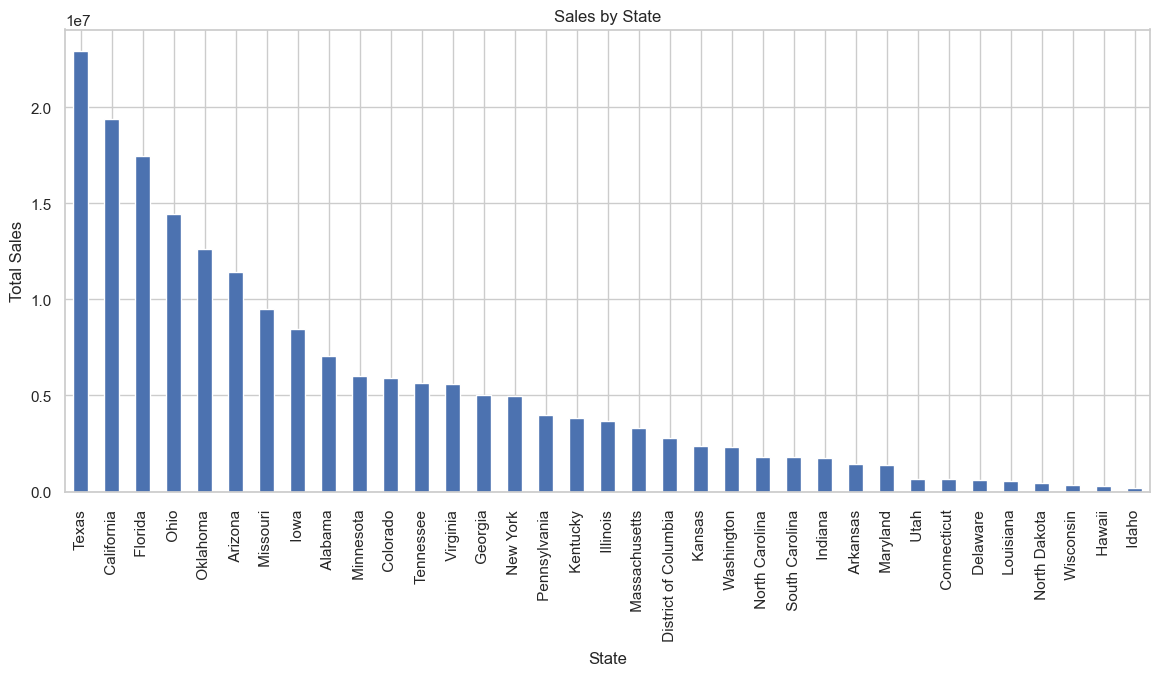

In [105]:
# sales by state
sales_by_state = df.groupby('state')['selling_price'].sum().sort_values(ascending=False)
print(f'--------------sales by state---------------\n {sales_by_state}')
sales_by_state.plot(kind='bar', title='Sales by State', xlabel='State', ylabel='Total Sales', figsize=(14, 6))


- Best-Performing stores (by revenue & profit)

--------------revenue by store---------------
     store_id  selling_price
84     S0085        3493434
37     S0038        3410801
96     S0097        3058144
103    S0104        3022648
47     S0048        2943250
27     S0028        2863980
61     S0062        2853455
25     S0026        2826515
93     S0094        2804194
19     S0020        2784090


<Axes: title={'center': 'Top 10 Stores by Revenue'}, xlabel='Store ID', ylabel='Total Revenue'>

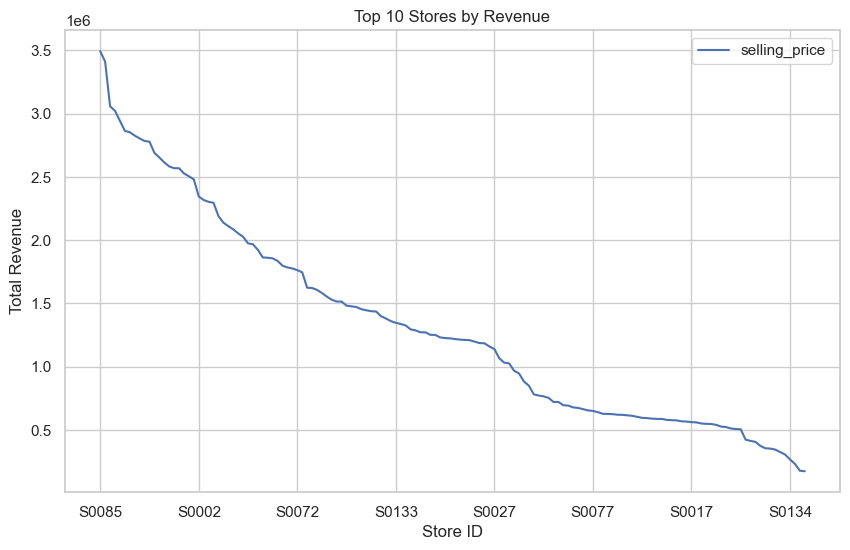

In [108]:
# Best-Performing stores (by revenue & profit)
# Calculate total revenue per store
revenue_by_store = df.groupby('store_id')['selling_price'].sum().reset_index().sort_values('selling_price', ascending=False)
print(f'--------------revenue by store---------------\n {revenue_by_store.head(10)}')
revenue_by_store.plot(kind='line', x='store_id', y='selling_price', title='Top 10 Stores by Revenue', xlabel='Store ID', ylabel='Total Revenue')


- Store revenue trends over time

---------------------------store_monthly_revenue-------------------------------
     store_id  month  selling_price
0       S0001      1         252309
1       S0001      2         204510
2       S0001      3         189043
3       S0001      4         178735
4       S0001      5         191517
5       S0001      6         226424
6       S0001      7         254946
7       S0001      8         188642
8       S0001      9         210674
9       S0001     10         175845
10      S0001     11         193989
11      S0001     12         260917
12      S0002      1         220688
13      S0002      2         228718
14      S0002      3         170576
15      S0002      4         158605
16      S0002      5         212990
17      S0002      6         161122
18      S0002      7         189977
19      S0002      8         212612
20      S0002      9         195324
21      S0002     10         236177
22      S0002     11         183169
23      S0002     12         175101
24      S0003      1

<Axes: title={'center': 'Store Revenue Trends Over Time'}, xlabel='Month', ylabel='Total Revenue'>

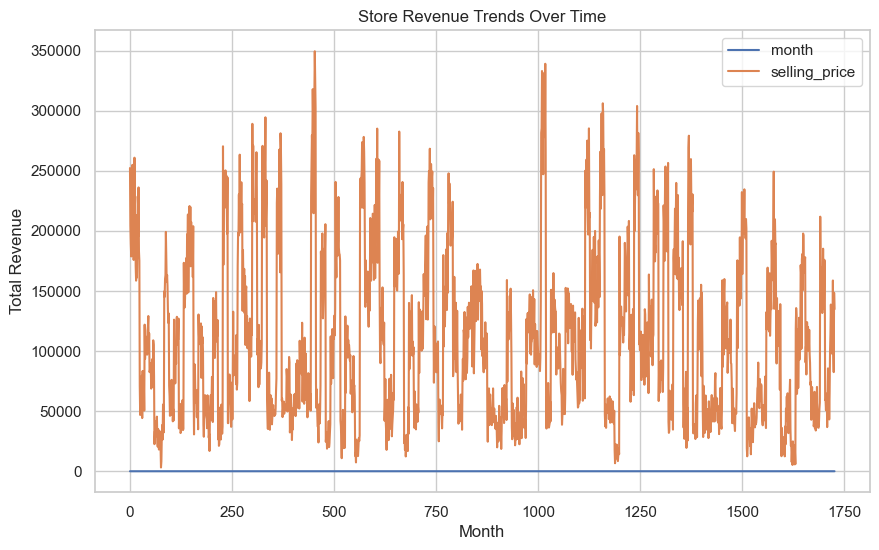

In [ ]:
store_monthly_revenue = df.groupby(['store_id', 'month'])['selling_price'].sum().reset_index()

print('---------------------------store_monthly_revenue-------------------------------')
print(store_monthly_revenue)
store_monthly_revenue.pivot(index='month', columns='store_id', values='selling_price').plot(title='Store Revenue Trends Over Time', xlabel='Month', ylabel='Total Revenue') 


-----------
# *<span style="color:pink">4. Customer Analysis</span>*
-----------

- Number of unique customers

In [125]:
# number of unique customers
print(f'Number of unique custoemers: {df["customer_id"].nunique()}')

Number of unique custoemers: 54228


- Top customers by revenue contribution

Top 10 Customers by Revenue Contribution:
 customer_id
123565522    20788
123499848    20301
123558469    19069
123552747    18961
123507905    18879
123476354    18680
123538455    18109
123561650    18047
123518476    17157
123523727    17120
Name: selling_price, dtype: int64


<Axes: title={'center': 'Top 10 Customers by Revenue Contribution'}, xlabel='Customer ID', ylabel='Total Revenue'>

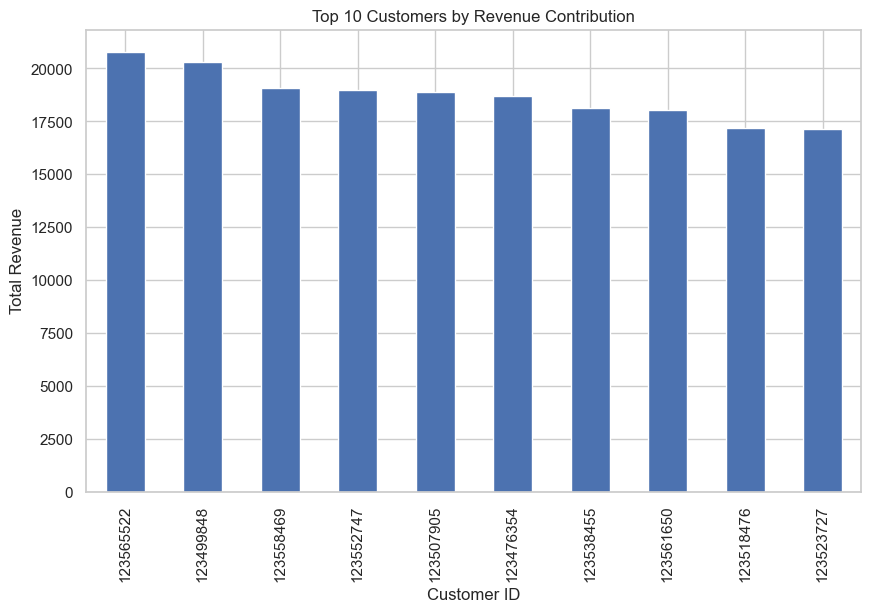

In [126]:
# top customers by revenue contribution
top_customers = df.groupby('customer_id')['selling_price'].sum().sort_values(ascending=False).head(10)
print(f'Top 10 Customers by Revenue Contribution:\n {top_customers}')
top_customers.plot(kind='bar', title='Top 10 Customers by Revenue Contribution', xlabel='Customer ID', ylabel='Total Revenue')


- Average spend per customer

In [132]:
# average spend per customer
average_spend_per_customer = df.groupby('customer_id')['selling_price'].sum().mean()
print(f'Average Spend per Customer: {average_spend_per_customer:,.2f}')

Average Spend per Customer: 3,511.24
